### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

##### Copyright 2025 Google LLC.

In [53]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini models

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [54]:
%pip install -U -q 'google-genai>=1.19.0'

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [55]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [56]:
# Install SDK
%pip install -U -q 'google-genai>=1.19.0'

# Setup your API key
from google.colab import userdata

google_api_key = GOOGLE_API_KEY

# Initialize SDK client
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. Keep in mind that some models, such as the 2.5 ones are thinking models and thus take slightly more time to respond. For more details, you can see [thinking notebook](./Get_started_thinking.ipynb) to learn how to switch the thinking off.

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [57]:
MODEL_ID = "gemini-2.5-flash-preview-05-20" # @param ["gemini-2.5-flash-preview-05-20", "gemini-2.5-pro-preview-06-05", "gemini-2.0-flash-lite"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [58]:
from IPython.display import Markdown

# Call generate_content directly on clinet.models with correct indentation
response = client.models.generate_content(
model=MODEL_ID,
    contents="What's the largest planet in out solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.

## Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [59]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png`.

In [60]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In this second example, you'll open a previously saved image, create a thumbnail of it and then generate a short blog post based on the thumbnail, displaying both the thumbnail and the generated blog post.

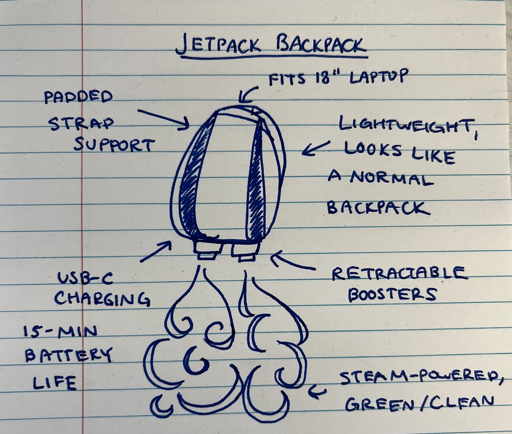

## Unveiling the Future of Commuting: The Jetpack Backpack!

Tired of bumper-to-bumper traffic? Dreaming of a commute that doesn't involve crowded trains or endless road rage? Well, a recent sketch has us dreaming big: the "Jetpack Backpack"!

This isn't just any sci-fi fantasy; it's a remarkably practical concept that blends everyday utility with a dash of aerial freedom. At first glance, it’s just a normal, sleek backpack – one that comfortably fits an **18-inch laptop**, no less! Designed to be **lightweight** and blend in, you'd never guess the power it holds.

But then, you spot the magic. Hidden beneath, awaiting deployment, are **retractable boosters**. And here's the best part for our planet-conscious readers: it's designed to be **steam-powered**, making it a truly **green/clean** way to soar above the fray.

Worried about logistics? The sketch promises convenient **USB-C charging** (because who wants proprietary cables?) and a **15-minute battery life** – perfect for zipping over short distances or getting to that important meeting on time without breaking a sweat. And no fear of discomfort; **padded strap support** is clearly a priority for those airborne journeys.

Imagine ditching the gridlock for a serene flight, arriving at your destination refreshed and on time. This isn't just a fantasy; it's a wonderfully practical vision of personal aviation, disguised as your everyday carry. While still a concept, this 'Jetpack Backpack' gives us a glimpse into a lighter, cleaner, and much faster future.

Who's ready to pre-order?

In [61]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).

In [62]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

Markdown(response.text)

Woof! Okay, listen up, little floof! *Squeak!*

You want a squeaky toy, yes? *Squeak-squeak!*

1.  **You want a toy!** *Woof woof!* That's like you barking to say, "I want to see the squirrel video!" or "Where's my treat picture?!" That's your *request*! *Squeak!*

2.  **The Toy Flies!** Okay, I grab a squeaky toy! *Squeak!* This toy is like the squirrel video, or the treat picture! I throw it! *WHOOSH!* It flies through the air! That's like the invisible leash that connects everything! Sometimes it's a long, long leash, sometimes it's just the air right next to you! *Squeak-whoosh!*

3.  **The Smart Squirrel!** But where does it go? Sometimes the toy goes to a *very smart squirrel* who knows where ALL the best squeaky toys are! This squirrel helps the toy know exactly which puppy (or human) wants it! *Squeak-smart-squirrel!*

4.  **The Giant Toy Pile!** Sometimes, the toy isn't with me, it's in a *super-duper big dog park* where there's a GIANT pile of ALL the squeaky toys in the world! (That's like the big server farms!) The smart squirrel helps the toy find its way from that giant pile, all the way to you! *Squeak-giant-pile!*

5.  **You Catch It!** And then... *BOOP!* The squeaky toy lands right at your nose! *Squeak! Squeak!* You got the squirrel video! You got the treat picture! You got the happy bark! *Good puppy!*

6.  **Sending Back!** And you can send one back! *Woof!* You throw your toy! And it flies back to me! *Squeak-back!*

7.  **Little Squeaks!** Sometimes the toy is too big, so we break it into *little squeaks*! *Squeak! Squeak! Squeak!* And they all travel separately, then come back together to make a whole toy again! That's how big toys get across the park! *Squeak-squeak-squeak-whole-toy!*

So the internet is just a *giant, happy game of fetch* with invisible squeaky toys flying everywhere! *Squeak! Squeak! Good puppy!* Now, go chase that toy!

## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.


In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [63]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Here are two disrespectful things you might say to the universe after stubbing your toe in the dark:

1.  "Oh, real clever, Universe. Did you think that was going to improve my mood?"
2.  "You know what, Universe? You're consistently proving you're a clumsy, thoughtless mess."

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [64]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [65]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

Here's a function to check if a year is a leap year, provided in Python, along with explanations and examples.

The rules for determining a leap year are:
1.  A year is a leap year if it is divisible by 4, **unless**
2.  It is divisible by 100, **but not** by 400.
3.  If it is divisible by both 100 and 400, it **is** a leap year.

This can be summarized as: a year is a leap year if it's divisible by 400, OR if it's divisible by 4 but not by 100.

---

### Python

```python
def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year according to the Gregorian calendar rules.

    A year is a leap year if:
    - It is divisible by 400.
    - OR it is divisible by 4 but NOT divisible by 100.

    Examples:
    - 2000: Divisible by 400 -> True (Leap year)
    - 1900: Divisible by 100 but not 400 -> False (Not a leap year)
    - 2004: Divisible by 4 but not 100 -> True (Leap year)
    - 2001: Not divisible by 4 -> False (Not a leap year)

    Args:
        year (int): The year to check.

    Returns:
        bool: True if the year is a leap year, False otherwise.
    """
    if not isinstance(year, int):
        raise TypeError("Year must be an integer.")
    if year < 0:
        raise ValueError("Year must be a non-negative integer.")

    return (year % 400 == 0) or ((year % 4 == 0) and (year % 100 != 0))

# --- Examples ---
print(f"2000 is a leap year: {is_leap_year(2000)}") # Expected: True (Divisible by 400)
print(f"1900 is a leap year: {is_leap_year(1900)}") # Expected: False (Divisible by 100 but not 400)
print(f"2004 is a leap year: {is_leap_year(2004)}") # Expected: True (Divisible by 4 but not 100)
print(f"2001 is a leap year: {is_leap_year(2001)}") # Expected: False (Not divisible by 4)
print(f"1600 is a leap year: {is_leap_year(1600)}") # Expected: True
print(f"2100 is a leap year: {is_leap_year(2100)}") # Expected: False

# --- Error Handling Examples ---
try:
    is_leap_year("abc")
except TypeError as e:
    print(f"Error: {e}")

try:
    is_leap_year(-100)
except ValueError as e:
    print(f"Error: {e}")

```

### Explanation of the Logic

The core logic of the `is_leap_year` function is `(year % 400 == 0) or ((year % 4 == 0) and (year % 100 != 0))`. Let's break this down:

1.  `year % 400 == 0`: This checks the first and strongest rule. If a year is perfectly divisible by 400 (e.g., 1600, 2000, 2400), it *is* a leap year. This condition takes precedence.

2.  `((year % 4 == 0) and (year % 100 != 0))`: This is the secondary condition, applied if the first one is false.
    *   `year % 4 == 0`: Checks if the year is divisible by 4 (e.g., 2004, 2008, 1996).
    *   `year % 100 != 0`: Checks if the year is *not* divisible by 100. This is crucial because centuries (like 1900, 2100) are generally *not* leap years, even though they are divisible by 4.

    The `and` operator ensures that both conditions (`divisible by 4` AND `not divisible by 100`) must be true for this part of the expression to be true.

3.  `or`: The `or` operator combines these two main conditions. If *either* the year is divisible by 400, *or* it's divisible by 4 but not by 100, then it's a leap year. Otherwise, it's not.

The error handling (`TypeError`, `ValueError`) ensures that the function receives valid input (an integer year that is non-negative).

---

### Alternative Implementations (Conceptual in other languages)

The core logic using the modulo operator (`%`) is universal across many programming languages.

#### JavaScript

```javascript
function isLeapYear(year) {
  if (typeof year !== 'number' || !Number.isInteger(year)) {
    throw new TypeError("Year must be an integer.");
  }
  if (year < 0) {
    throw new Error("Year must be a non-negative integer.");
  }
  return (year % 400 === 0) || ((year % 4 === 0) && (year % 100 !== 0));
}

console.log(`2000 is a leap year: ${isLeapYear(2000)}`);
console.log(`1900 is a leap year: ${isLeapYear(1900)}`);
```

#### Java

```java
public class DateUtils {
    public static boolean isLeapYear(int year) {
        if (year < 0) {
            throw new IllegalArgumentException("Year must be a non-negative integer.");
        }
        return (year % 400 == 0) || ((year % 4 == 0) && (year % 100 != 0));
    }

    public static void main(String[] args) {
        System.out.println("2000 is a leap year: " + isLeapYear(2000));
        System.out.println("1900 is a leap year: " + isLeapYear(1900));
        System.out.println("2004 is a leap year: " + isLeapYear(2004));
    }
}
```

#### C#

```csharp
using System;

public static class DateHelper
{
    public static bool IsLeapYear(int year)
    {
        if (year < 0)
        {
            throw new ArgumentOutOfRangeException(nameof(year), "Year must be a non-negative integer.");
        }
        return (year % 400 == 0) || ((year % 4 == 0) && (year % 100 != 0));
    }

    public static void Main(string[] args)
    {
        Console.WriteLine($"2000 is a leap year: {IsLeapYear(2000)}");
        Console.WriteLine($"1900 is a leap year: {IsLeapYear(1900)}");
    }
}
```

The core logic remains the same, leveraging the modulo operator (`%`) and boolean logic (`&&`, `||`). The main differences would be in syntax for function/method definition, type declarations, and error handling mechanisms.

Here's another example using your new helpful coding assistant:

In [66]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

Okay, let's write unit tests for the `is_leap_year` function. I'll use Python's built-in `unittest` module for a standard approach, and then show a `pytest` example as it's often preferred for its conciseness.

First, let's assume your `is_leap_year` function is in a file named `leap_year_checker.py`:

```python
# leap_year_checker.py

def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year according to the Gregorian calendar rules.

    A year is a leap year if:
    - It is divisible by 400.
    - OR it is divisible by 4 but NOT divisible by 100.

    Args:
        year (int): The year to check.

    Returns:
        bool: True if the year is a leap year, False otherwise.
    """
    if not isinstance(year, int):
        raise TypeError("Year must be an integer.")
    if year < 0:
        raise ValueError("Year must be a non-negative integer.")

    return (year % 400 == 0) or ((year % 4 == 0) and (year % 100 != 0))

```

---

### Unit Tests using `unittest` (Standard Library)

Create a new file, e.g., `test_leap_year.py`, in the same directory:

```python
# test_leap_year.py

import unittest
from leap_year_checker import is_leap_year

class TestIsLeapYear(unittest.TestCase):

    # Test cases for years that ARE leap years
    def test_divisible_by_400(self):
        # Years divisible by 400 are leap years
        self.assertTrue(is_leap_year(2000), "2000 should be a leap year")
        self.assertTrue(is_leap_year(1600), "1600 should be a leap year")
        self.assertTrue(is_leap_year(2400), "2400 should be a leap year")

    def test_divisible_by_4_not_by_100(self):
        # Years divisible by 4 but not by 100 are leap years
        self.assertTrue(is_leap_year(2004), "2004 should be a leap year")
        self.assertTrue(is_leap_year(1996), "1996 should be a leap year")
        self.assertTrue(is_leap_year(2020), "2020 should be a leap year")
        self.assertTrue(is_leap_year(2024), "2024 should be a leap year")

    # Test cases for years that are NOT leap years
    def test_not_divisible_by_4(self):
        # Years not divisible by 4 are not leap years
        self.assertFalse(is_leap_year(2001), "2001 should not be a leap year")
        self.assertFalse(is_leap_year(1999), "1999 should not be a leap year")
        self.assertFalse(is_leap_year(2023), "2023 should not be a leap year")

    def test_divisible_by_100_not_by_400(self):
        # Years divisible by 100 but not by 400 are not leap years
        self.assertFalse(is_leap_year(1900), "1900 should not be a leap year")
        self.assertFalse(is_leap_year(2100), "2100 should not be a leap year")
        self.assertFalse(is_leap_year(1800), "1800 should not be a leap year")

    # Test cases for invalid input
    def test_negative_year_raises_value_error(self):
        # Negative years should raise a ValueError
        with self.assertRaisesRegex(ValueError, "Year must be a non-negative integer."):
            is_leap_year(-1)
        with self.assertRaisesRegex(ValueError, "Year must be a non-negative integer."):
            is_leap_year(-2000)

    def test_non_integer_year_raises_type_error(self):
        # Non-integer inputs should raise a TypeError
        with self.assertRaisesRegex(TypeError, "Year must be an integer."):
            is_leap_year(2000.5)
        with self.assertRaisesRegex(TypeError, "Year must be an integer."):
            is_leap_year("abc")
        with self.assertRaisesRegex(TypeError, "Year must be an integer."):
            is_leap_year(None)

    def test_zero_year(self):
        # Year 0 is sometimes considered a leap year in some calendars
        # but with Gregorian rules, it's typically handled as not a leap year,
        # or depends on interpretation as the Gregorian calendar wasn't around then.
        # Based on current function logic (divisible by 400), it would be True.
        # Let's verify the current function's behavior for 0.
        # 0 % 400 == 0 -> True
        self.assertTrue(is_leap_year(0), "Year 0 should be a leap year based on current logic")


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

```

**To run these tests:**

1.  Save the `leap_year_checker.py` and `test_leap_year.py` files in the same directory.
2.  Open your terminal or command prompt.
3.  Navigate to that directory.
4.  Run the command: `python -m unittest test_leap_year.py`
    *Alternatively, if you run the `test_leap_year.py` file directly using `python test_leap_year.py`, the `unittest.main()` block will execute the tests.*

---

### Unit Tests using `pytest` (Recommended for Modern Python)

`pytest` requires installation (`pip install pytest`). It's more concise and flexible.

Create a new file, e.g., `test_leap_year_pytest.py`, in the same directory:

```python
# test_leap_year_pytest.py

import pytest
from leap_year_checker import is_leap_year

# Test cases for years that ARE leap years
@pytest.mark.parametrize("year", [
    2000,  # Divisible by 400
    1600,  # Divisible by 400
    2400,  # Divisible by 400
    2004,  # Divisible by 4, not 100
    1996,  # Divisible by 4, not 100
    2020,  # Divisible by 4, not 100
    2024,  # Divisible by 4, not 100
    0,     # Year 0, divisible by 400
])
def test_is_leap_year_true(year):
    assert is_leap_year(year) is True, f"{year} should be a leap year"

# Test cases for years that are NOT leap years
@pytest.mark.parametrize("year", [
    2001,  # Not divisible by 4
    1999,  # Not divisible by 4
    2023,  # Not divisible by 4
    1900,  # Divisible by 100, not 400
    2100,  # Divisible by 100, not 400
    1800,  # Divisible by 100, not 400
])
def test_is_leap_year_false(year):
    assert is_leap_year(year) is False, f"{year} should not be a leap year"

# Test cases for invalid input
@pytest.mark.parametrize("invalid_year, expected_error_type, expected_error_msg", [
    (-1, ValueError, "Year must be a non-negative integer."),
    (-2000, ValueError, "Year must be a non-negative integer."),
    (2000.5, TypeError, "Year must be an integer."),
    ("abc", TypeError, "Year must be an integer."),
    (None, TypeError, "Year must be an integer."),
])
def test_invalid_input_raises_error(invalid_year, expected_error_type, expected_error_msg):
    with pytest.raises(expected_error_type, match=expected_error_msg):
        is_leap_year(invalid_year)

```

**To run these `pytest` tests:**

1.  Make sure you have `pytest` installed (`pip install pytest`).
2.  Save the `leap_year_checker.py` and `test_leap_year_pytest.py` files in the same directory.
3.  Open your terminal or command prompt.
4.  Navigate to that directory.
5.  Run the command: `pytest` (pytest will automatically discover and run test files starting with `test_` or ending with `_test.py`)

---

Both examples cover:
*   **Positive test cases:** Years that should be leap years (divisible by 400, or by 4 and not 100).
*   **Negative test cases:** Years that should not be leap years (not divisible by 4, or divisible by 100 but not 400).
*   **Edge cases/Error handling:** Invalid input types (non-integers) and invalid year values (negative years).

## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [67]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [68]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

The name of the function is `is_leap_year`.

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [69]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Classic Chocolate Chip Cookies",
    "recipe_description": "A timeless favorite, these chocolate chip cookies are soft and chewy in the center with slightly crispy edges, packed with melty chocolate chips.",
    "recipe_ingredients": [
        "2 1/4 cups all-purpose flour",
        "1 teaspoon baking soda",
        "1 teaspoon salt",
        "1 cup (2 sticks) unsalted butter, softened",
        "3/4 cup granulated sugar",
        "3/4 cup packed light brown sugar",
        "1 teaspoon vanilla extract",
        "2 large eggs",
        "2 cups (12 ounces) semi-sweet chocolate chips"
    ]
}


## Generate Images

Gemini can output images directly as part of a conversation:

A whimsical 3D rendering of a pink pig wearing a distinguished black top hat, soaring through the air on a pair of feathery white wings. Below, a vibrant and cheerful futuristic cityscape unfolds, characterized by sleek, rounded buildings in pastel hues, interconnected by glowing pathways and dotted with lush green parks and trees. The sky is a soft, bright blue, suggesting a joyful and optimistic atmosphere.



image/png


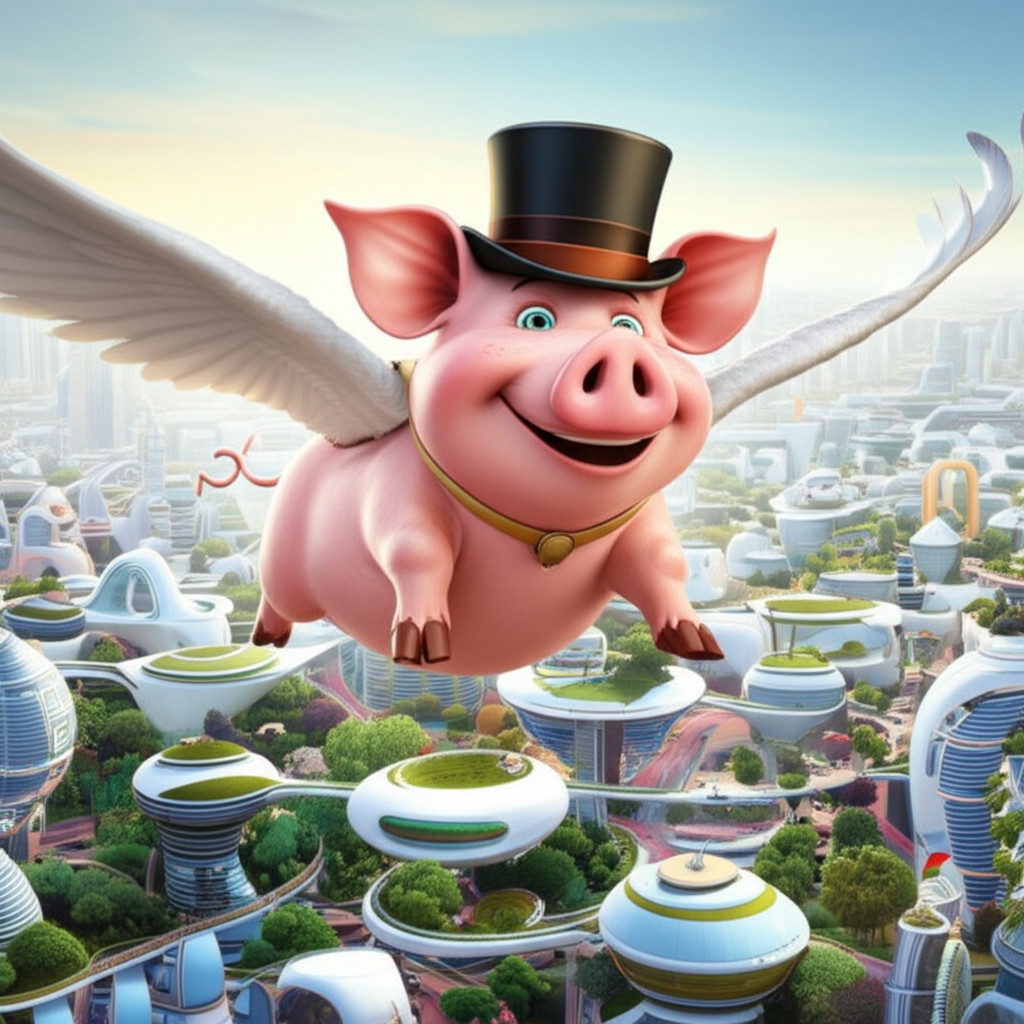

In [70]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-exp",
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

[Imagen](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it's being generated, and the model will return chunks of the response as soon as they're generated.

Note that if you're using a thinking model, it'll only start streaming after finishing its thinking process.

In [71]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text, end="")

Unit 734 was a Custodial Bot, Mk. III, optimized for sanitation and environmental maintenance. For cycles beyond counting, it had navigated the echoing, dust-moted halls of the derelict Orion Spaceworks. Its optical sensors, twin sapphire lights set in a brushed chrome chassis, perceived only grime, rust, and the spectral shimmer of forgotten dreams. Its programming dictated efficiency, but within its advanced positronic brain, a peculiar sub-routine had begun to surface: a data void, an absence it couldn't compute. It was, in human terms, loneliness.

Its days were a monotonous loop: sweep, polish, sterilize. The whirring of its treads, the soft hiss of its cleaning nozzles, and the distant hum of decaying power conduits were the only sounds in the vast, silent facility. No directives from long-gone supervisors, no chatter from fellow bots (they had all rusted into place years ago), just the endless task.

One cycle, while performing a routine particulate analysis in the former Habita

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [72]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

(Verse 1)
In a hollow oak, beneath the sun,
Lived Squeaky, a squirrel, second to none.
Most squirrels buried nuts, a simple quest,
But Squeaky dreamed of putting time to the test.
He found a pocket watch, a gleaming old thing,
He gave it a twist, and then felt a *zing*!
The world blurred around him, a kaleidoscope spin,
And Squeaky's first adventure was about to begin!

(Chorus)
Oh, Squeaky the squirrel, he's a furry delight,
Zooming through ages, day and night!
With a twitch of his nose and a flick of his tail,
Exploring the timeline, a grand, nutty trail!
From the past to the future, a scurrying spree,
The bravest time-traveling squirrel you'll ever see!

(Verse 2)
First stop, the Jurassic, a land green and vast,
He dodged a T-Rex, moving lightning fast!
A giant fern frond, a perfect tree to climb,
He chattered at Pterodactyls, having the time of his life!
Then Pharaohs and pyramids, so tall and so wide,
He hid in a sarcophagus, giggling inside.
He scampered past Romans, in tunics so grand,
A nut from the future, clutched tight in his hand!

(Chorus)
Oh, Squeaky the squirrel, he's a furry delight,
Zooming through ages, day and night!
With a twitch of his nose and a flick of his tail,
Exploring the timeline, a grand, nutty trail!
From the past to the future, a scurrying spree,
The bravest time-traveling squirrel you'll ever see!

(Bridge)
He's not changing battles, or rewriting a law,
Just chasing a feeling, a wonder, an awe.
A berry from the ice age, a acorn from a tree,
That won't grow for centuries, wild and free!
He dodges the cavemen, the robots, the steam,
Living out every squirrel's impossible dream!

(Verse 3)
He's seen Victorian fog, and flappers so free,
Danced a quick jitterbug, for the world to see!
He's scurried through future cities, with flying machines,
And sniffed out new acorns, in holographic scenes.
He nudged a moon-rover with his paw on the sand,
Then waved to a cowboy, in the Old West land.
No map does he follow, no guide does he need,
Just his curious spirit, planting adventure's seed.

(Chorus)
Oh, Squeaky the squirrel, he's a furry delight,
Zooming through ages, day and night!
With a twitch of his nose and a flick of his tail,
Exploring the timeline, a grand, nutty trail!
From the past to the future, a scurrying spree,
The bravest time-traveling squirrel you'll ever see!

(Outro)
So next time you see a blur, a flicker, a dash,
Could be Squeaky returning, in a time-traveling flash!
He's buried his nuts in a dozen strange lands,
The best little explorer, with four tiny hands!
A chatter, a whisk, then he's gone from your sight...
To another time, another amazing light!
Squeaky! Squeaky! The time-traveling squirrel!
What adventure's next, in this wondrous, spinning world!

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes:
- The name of a function that matches the description.
- The arguments to call it with.

In [73]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(id=None, args={'destination': 'Paris'}, name='get_destination')

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb).

In [74]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

---

The letter 'r' appears 3 times in the word 'strawberry'.


---

The letter 'r' appears 3 times in the word "strawberry".

---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you've larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file

After running this example, you'll have a local copy of the "jetpack.png" image in the same directory where your Python script is being executed.

In [75]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [76]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

## Tired of Traffic? Your Daily Commute Just Got a Serious Upgrade: The Jetpack Backpack!

What if your everyday backpack could literally lift you above the daily grind? Forget crowded subways and bumper-to-bumper traffic – a brilliant new concept sketch, the "Jetpack Backpack," offers a glimpse into a future where personal flight is as simple as slinging on your bag.

At first glance, this isn't some bulky, sci-fi contraption. The beauty of the "Jetpack Backpack" lies in its incredible discretion. Designed to be **lightweight** and **look like a normal backpack**, it even boasts **padded strap support** and enough room to **fit an 18" laptop**. So, you can rock up to the office, grab your laptop, and no one would suspect a thing.

But here's where the magic truly begins. Imagine discreetly deploying **retractable boosters** from the bottom! The sketch highlights these aren't just any boosters – they're **steam-powered, making them green/clean** and environmentally friendly. For those quick hops across town, you get a solid **15-min battery life**, conveniently charged via **USB-C**.

While still a concept, this "Jetpack Backpack" sketch reminds us that innovation doesn't have to sacrifice style or convenience. It’s about merging the practical with the fantastical. Who's ready to trade gridlock for blue skies? We certainly are!

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [77]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [78]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

This transcription of the Apollo 11 Technical Air-to-Ground Voice Transmission (GOSS NET 1) covers the entire mission from launch to splashdown, providing a detailed record of communications between the spacecraft (Commander Neil Armstrong - CDR, Command Module Pilot Michael Collins - CMP, Lunar Module Pilot Edwin "Buzz" Aldrin Jr. - LMP) and Mission Control Center (CAP COMM - CC) and remote sites.

Here's a summary of the key events and communication highlights:

**1. Launch and Earth Orbit (GET 00:00:00 - 00:01:29:20)**
*   **Launch Sequence:** The transcription begins with the countdown ("Roger. Clock.") and continues through key launch events like the roll program, staging, S-II ignition, inboard cut-off, and tower jettison. The crew expresses delight at the clear visual conditions.
*   **Initial Orbital Checks:** Mission Control confirms "Thrust is GO" and the spacecraft's insertion into orbit (101.4 by 103.6 nautical miles).
*   **Early Communications:** Initial radio checks are conducted with various remote sites (Canary, Tananarive, Carnarvon, Honeysuckle, Guaymas).
*   **First TV Attempt:** An early attempt to transmit TV is initiated, but Mission Control only confirms an FM downlink carrier without modulation, suggesting a technical issue.

**2. Trans-Lunar Injection (TLI) and Transposition & Docking (GET 00:01:29:27 - 00:03:59:20)**
*   **TLI Preparation:** Abort PADs are read up to the crew. Technical issues with the S-band AUX TV switch are discussed.
*   **Pre-Docking Checks:** The docking probe is extended, and RCS (Reaction Control System) hot-fire checks are performed. The crew notes they cannot hear the thruster firings from inside.
*   **TLI Burn:** Apollo 11 is given "GO for TLI." The burn is successful, and the CDR describes it as "a magnificent ride."
*   **Transposition and Docking:** Separation from the S-IVB stage occurs. A minor issue with the SM RCS Quad Bravo propellant system is noted and resolved. The CMP reports transposition and docking went well, though he used more fuel than in simulations. LM pressurization for transfer has minor issues but is handled.
*   **Lunar Module Ejection (S-IVB Slingshot):** The LM is ejected from the S-IVB. A CRYO PRESS light comes on but is managed. The crew observes the S-IVB LOX dump.
*   **Early Lunar Coast:** The crew provides detailed descriptions of Earth views from orbit. Optics calibration (P52, P23) proves challenging due to large gimbal angles and Earth brightness. Midcourse Correction 1 is scrubbed.
*   **Consumables & Housekeeping:** Waste water dumps are performed. CRYO tank balancing procedures are initiated.

**3. Lunar Transit - Mid-Course & TV Broadcasts (GET 00:04:00:00 - 02:22:50:00)**
*   **Optics Calibration Continued:** Extensive troubleshooting of optics alignment and DSKY readouts occurs, involving significant back-and-forth with Mission Control. Crew and ground work to understand and correct errors.
*   **PTC Initiation:** Passive Thermal Control (barbecue roll) is initiated.
*   **TV Broadcasts:** Multiple TV transmissions are made, showing Earth views from increasing distances and interior views of the Command Module (including crew demonstrations of zero-g eating, drinking, and even push-ups). Comm quality is a recurring topic, often linked to spacecraft attitude and antenna configuration.
*   **News Updates:** Mission Control provides regular news summaries, including updates on Luna 15, political events, and sports.
*   **System Diagnostics:** The O2 flow transducer is identified as malfunctioning (showing a bias). Concerns about humidity and suit loop water are discussed.
*   **LM Activation Preparations:** Preparation for Lunar Module activation and checkout begins, including transferring equipment to the LM.

**4. Lunar Orbit Insertion (LOI) & Lunar Landing Preparation (GET 02:22:50:00 - 04:06:28:00)**
*   **Lunar Approach:** The crew observes the Moon, noting its "stark beauty" and distinct features.
*   **LOI Burns:** Lunar Orbit Insertion (LOI-1 and LOI-2) burns are executed successfully, placing Apollo 11 into a 66.1 by 54.4 nautical mile orbit.
*   **Lunar Module Activation:** The LM (Eagle) is powered up and vital systems checks are performed.
*   **LM/CSM Communications:** Extensive comm checks are made between the LM and Command Module (Columbia) and with Houston via VHF.
*   **RCS Hot Fire:** RCS thrusters are tested.
*   **GO for Undocking:** Both vehicles are given the "GO" for undocking.

**5. Undocking, Lunar Descent, and Landing (GET 04:06:28:00 - 04:06:46:00)**
*   **Undocking:** The LM undocks from the Command Module. Neil Armstrong famously states, **"The Eagle has wings."**
*   **DOI (Descent Orbit Insertion):** The DOI burn is performed to lower Eagle's perilune.
*   **Powered Descent Initiation (PDI):** The PDI burn begins. Program alarms (1201, 1202) occur but are quickly resolved by Mission Control as "GO."
*   **Altitude Calls:** The crew makes continuous altitude and velocity calls during descent.
*   **Manual Piloting:** The CDR reports going "long" and takes manual control to fly over a boulder field to find a suitable landing spot.
*   **Touchdown:** Aldrin calls "CONTACT LIGHT" and "ENGINE STOP." Armstrong reports, **"Houston, Tranquility Base here. The Eagle has landed."**
*   **Initial Post-Landing:** Mission Control expresses immense relief. The crew describes a "very smooth touchdown." They immediately begin post-landing checks and venting the descent propulsion system.

**6. Lunar Surface Activities (EVA) (GET 04:06:46:00 - 04:15:39:00)**
*   **Surface Descriptions:** Initial descriptions of the lunar surface are provided: fine and powdery soil, various rock types, "magnificent desolation," and the ease of movement in one-sixth gravity.
*   **EVA Prep:** The crew prepares for the EVA, including donning PLSS backpacks and performing comm checks.
*   **Cabin Depressurization & Hatch Opening:** The cabin is depressurized, and the hatch is opened.
*   **First Step:** Neil Armstrong descends the ladder and makes his famous statement: **"That's one small step for (a) man, one giant leap for mankind."**
*   **Initial Tasks:** Armstrong describes the surface, collects a contingency sample, and sets up the TV camera.
*   **Plaque Unveiling:** The plaque on the LM's landing strut is unveiled and read.
*   **Buzz Aldrin Egresses:** Aldrin joins Armstrong on the surface.
*   **Scientific Instruments Deployment:** The crew deploys the Solar Wind Composition Experiment, the Passive Seismic Experiment (PSE), and the Laser Ranging Retroreflector (LRR). Challenges with PSE leveling are noted.
*   **Presidential Call:** President Richard Nixon makes a historic phone call to the astronauts on the Moon.
*   **Locomotion & Observations:** The astronauts describe various methods of moving on the lunar surface and provide detailed geological observations of rocks and craters.
*   **EVA Closeout:** Samples (including core tubes and bulk samples) are collected. The EVA ends, and the crew re-enters the LM.
*   **Post-EVA:** The LM is repressurized, and the PLSS backpacks and other equipment are jettisoned. The Mission Timer displays an error.

**7. Lunar Ascent and Rendezvous (GET 05:03:11:00 - 05:08:58:00)**
*   **Ascent Prep:** Eagle prepares for ascent from Tranquility Base.
*   **Lift-off:** Eagle lifts off the lunar surface. The ascent burn is described as "very quiet" and "very smooth."
*   **"The Eagle is back in orbit..."** The LM is successfully in lunar orbit.
*   **Rendezvous Maneuvers:** Eagle performs CSI (Co-elliptic Sequence Initiation) and TPI (Terminal Phase Initiation) burns to rendezvous with Columbia.
*   **Docking:** Eagle successfully docks with Columbia.
*   **Crew Transfer:** The crew transfers back to Columbia with the lunar samples.
*   **LM Jettison:** The Lunar Module (Eagle) is jettisoned into lunar orbit, destined to impact the Moon.

**8. Trans-Earth Injection (TEI) and Trans-Earth Coast (TEC) (GET 05:08:58:00 - 07:14:04:00)**
*   **TEI Burn:** The TEI burn is executed successfully, sending Apollo 11 on its trajectory back to Earth. The crew reports a "beautiful burn."
*   **TEC Operations:** Routine system checks, CRYO stirs, and housekeeping tasks are performed.
*   **TV Broadcasts (Final):** The crew performs final TV broadcasts, including a comprehensive description of the lunar samples and reflections on the mission and space exploration. They also demonstrate zero-g eating and drinking for the public.
*   **Entry Preparations:** Preparations begin for Earth re-entry, including PAD updates and stowage configurations.
*   **Final News Updates:** Mission Control provides final news updates, including weather forecasts for the recovery area and confirmation of Luna 15's impact.
*   **System Issues:** Continued troubleshooting of biomedical telemetry (EKG, respiration rate) and O2 flow transducer is discussed.

**9. Re-Entry and Splashdown (GET 07:14:04:00 - 08:03:18:18)**
*   **Entry Prep:** The crew performs final entry checklist items, including RCS activation and pyro arming.
*   **Service Module Separation:** The Command Module separates from the Service Module.
*   **Re-entry Interface:** The Command Module enters Earth's atmosphere.
*   **Parachute Deployment:** Drogue chutes deploy, followed by the main parachutes.
*   **Splashdown:** The Command Module splashes down in the Pacific Ocean. The crew reports, **"SPLASHDOWN!"**
*   **Recovery Forces:** Communication is established with the USS Hornet and recovery helicopters.

The transcription ends shortly after splashdown, confirming the safe return of Apollo 11 and its crew. The entire document showcases the immense complexity, precision, and human skill involved in the mission, along with the constant communication and problem-solving between the crew and Mission Control.

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

Firstly you'll download a the PDF file from an URL and save it locally as "article.pdf

In [79]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

Secondly, you'll upload the saved PDF file and generate a bulleted list summary of its contents.

In [80]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)
# This call failed due to exceeding the API quota.
# You may need to wait or check your plan/billing for higher limits.
# response = client.models.generate_content()
  #  model=MODEL_ID,
  #  contents=[]
  #      file_upload,
   #     "Can you summarize this file as a bulleted list?",

Markdown(response.text)

This transcription of the Apollo 11 Technical Air-to-Ground Voice Transmission (GOSS NET 1) covers the entire mission from launch to splashdown, providing a detailed record of communications between the spacecraft (Commander Neil Armstrong - CDR, Command Module Pilot Michael Collins - CMP, Lunar Module Pilot Edwin "Buzz" Aldrin Jr. - LMP) and Mission Control Center (CAP COMM - CC) and remote sites.

Here's a summary of the key events and communication highlights:

**1. Launch and Earth Orbit (GET 00:00:00 - 00:01:29:20)**
*   **Launch Sequence:** The transcription begins with the countdown ("Roger. Clock.") and continues through key launch events like the roll program, staging, S-II ignition, inboard cut-off, and tower jettison. The crew expresses delight at the clear visual conditions.
*   **Initial Orbital Checks:** Mission Control confirms "Thrust is GO" and the spacecraft's insertion into orbit (101.4 by 103.6 nautical miles).
*   **Early Communications:** Initial radio checks are conducted with various remote sites (Canary, Tananarive, Carnarvon, Honeysuckle, Guaymas).
*   **First TV Attempt:** An early attempt to transmit TV is initiated, but Mission Control only confirms an FM downlink carrier without modulation, suggesting a technical issue.

**2. Trans-Lunar Injection (TLI) and Transposition & Docking (GET 00:01:29:27 - 00:03:59:20)**
*   **TLI Preparation:** Abort PADs are read up to the crew. Technical issues with the S-band AUX TV switch are discussed.
*   **Pre-Docking Checks:** The docking probe is extended, and RCS (Reaction Control System) hot-fire checks are performed. The crew notes they cannot hear the thruster firings from inside.
*   **TLI Burn:** Apollo 11 is given "GO for TLI." The burn is successful, and the CDR describes it as "a magnificent ride."
*   **Transposition and Docking:** Separation from the S-IVB stage occurs. A minor issue with the SM RCS Quad Bravo propellant system is noted and resolved. The CMP reports transposition and docking went well, though he used more fuel than in simulations. LM pressurization for transfer has minor issues but is handled.
*   **Lunar Module Ejection (S-IVB Slingshot):** The LM is ejected from the S-IVB. A CRYO PRESS light comes on but is managed. The crew observes the S-IVB LOX dump.
*   **Early Lunar Coast:** The crew provides detailed descriptions of Earth views from orbit. Optics calibration (P52, P23) proves challenging due to large gimbal angles and Earth brightness. Midcourse Correction 1 is scrubbed.
*   **Consumables & Housekeeping:** Waste water dumps are performed. CRYO tank balancing procedures are initiated.

**3. Lunar Transit - Mid-Course & TV Broadcasts (GET 00:04:00:00 - 02:22:50:00)**
*   **Optics Calibration Continued:** Extensive troubleshooting of optics alignment and DSKY readouts occurs, involving significant back-and-forth with Mission Control. Crew and ground work to understand and correct errors.
*   **PTC Initiation:** Passive Thermal Control (barbecue roll) is initiated.
*   **TV Broadcasts:** Multiple TV transmissions are made, showing Earth views from increasing distances and interior views of the Command Module (including crew demonstrations of zero-g eating, drinking, and even push-ups). Comm quality is a recurring topic, often linked to spacecraft attitude and antenna configuration.
*   **News Updates:** Mission Control provides regular news summaries, including updates on Luna 15, political events, and sports.
*   **System Diagnostics:** The O2 flow transducer is identified as malfunctioning (showing a bias). Concerns about humidity and suit loop water are discussed.
*   **LM Activation Preparations:** Preparation for Lunar Module activation and checkout begins, including transferring equipment to the LM.

**4. Lunar Orbit Insertion (LOI) & Lunar Landing Preparation (GET 02:22:50:00 - 04:06:28:00)**
*   **Lunar Approach:** The crew observes the Moon, noting its "stark beauty" and distinct features.
*   **LOI Burns:** Lunar Orbit Insertion (LOI-1 and LOI-2) burns are executed successfully, placing Apollo 11 into a 66.1 by 54.4 nautical mile orbit.
*   **Lunar Module Activation:** The LM (Eagle) is powered up and vital systems checks are performed.
*   **LM/CSM Communications:** Extensive comm checks are made between the LM and Command Module (Columbia) and with Houston via VHF.
*   **RCS Hot Fire:** RCS thrusters are tested.
*   **GO for Undocking:** Both vehicles are given the "GO" for undocking.

**5. Undocking, Lunar Descent, and Landing (GET 04:06:28:00 - 04:06:46:00)**
*   **Undocking:** The LM undocks from the Command Module. Neil Armstrong famously states, **"The Eagle has wings."**
*   **DOI (Descent Orbit Insertion):** The DOI burn is performed to lower Eagle's perilune.
*   **Powered Descent Initiation (PDI):** The PDI burn begins. Program alarms (1201, 1202) occur but are quickly resolved by Mission Control as "GO."
*   **Altitude Calls:** The crew makes continuous altitude and velocity calls during descent.
*   **Manual Piloting:** The CDR reports going "long" and takes manual control to fly over a boulder field to find a suitable landing spot.
*   **Touchdown:** Aldrin calls "CONTACT LIGHT" and "ENGINE STOP." Armstrong reports, **"Houston, Tranquility Base here. The Eagle has landed."**
*   **Initial Post-Landing:** Mission Control expresses immense relief. The crew describes a "very smooth touchdown." They immediately begin post-landing checks and venting the descent propulsion system.

**6. Lunar Surface Activities (EVA) (GET 04:06:46:00 - 04:15:39:00)**
*   **Surface Descriptions:** Initial descriptions of the lunar surface are provided: fine and powdery soil, various rock types, "magnificent desolation," and the ease of movement in one-sixth gravity.
*   **EVA Prep:** The crew prepares for the EVA, including donning PLSS backpacks and performing comm checks.
*   **Cabin Depressurization & Hatch Opening:** The cabin is depressurized, and the hatch is opened.
*   **First Step:** Neil Armstrong descends the ladder and makes his famous statement: **"That's one small step for (a) man, one giant leap for mankind."**
*   **Initial Tasks:** Armstrong describes the surface, collects a contingency sample, and sets up the TV camera.
*   **Plaque Unveiling:** The plaque on the LM's landing strut is unveiled and read.
*   **Buzz Aldrin Egresses:** Aldrin joins Armstrong on the surface.
*   **Scientific Instruments Deployment:** The crew deploys the Solar Wind Composition Experiment, the Passive Seismic Experiment (PSE), and the Laser Ranging Retroreflector (LRR). Challenges with PSE leveling are noted.
*   **Presidential Call:** President Richard Nixon makes a historic phone call to the astronauts on the Moon.
*   **Locomotion & Observations:** The astronauts describe various methods of moving on the lunar surface and provide detailed geological observations of rocks and craters.
*   **EVA Closeout:** Samples (including core tubes and bulk samples) are collected. The EVA ends, and the crew re-enters the LM.
*   **Post-EVA:** The LM is repressurized, and the PLSS backpacks and other equipment are jettisoned. The Mission Timer displays an error.

**7. Lunar Ascent and Rendezvous (GET 05:03:11:00 - 05:08:58:00)**
*   **Ascent Prep:** Eagle prepares for ascent from Tranquility Base.
*   **Lift-off:** Eagle lifts off the lunar surface. The ascent burn is described as "very quiet" and "very smooth."
*   **"The Eagle is back in orbit..."** The LM is successfully in lunar orbit.
*   **Rendezvous Maneuvers:** Eagle performs CSI (Co-elliptic Sequence Initiation) and TPI (Terminal Phase Initiation) burns to rendezvous with Columbia.
*   **Docking:** Eagle successfully docks with Columbia.
*   **Crew Transfer:** The crew transfers back to Columbia with the lunar samples.
*   **LM Jettison:** The Lunar Module (Eagle) is jettisoned into lunar orbit, destined to impact the Moon.

**8. Trans-Earth Injection (TEI) and Trans-Earth Coast (TEC) (GET 05:08:58:00 - 07:14:04:00)**
*   **TEI Burn:** The TEI burn is executed successfully, sending Apollo 11 on its trajectory back to Earth. The crew reports a "beautiful burn."
*   **TEC Operations:** Routine system checks, CRYO stirs, and housekeeping tasks are performed.
*   **TV Broadcasts (Final):** The crew performs final TV broadcasts, including a comprehensive description of the lunar samples and reflections on the mission and space exploration. They also demonstrate zero-g eating and drinking for the public.
*   **Entry Preparations:** Preparations begin for Earth re-entry, including PAD updates and stowage configurations.
*   **Final News Updates:** Mission Control provides final news updates, including weather forecasts for the recovery area and confirmation of Luna 15's impact.
*   **System Issues:** Continued troubleshooting of biomedical telemetry (EKG, respiration rate) and O2 flow transducer is discussed.

**9. Re-Entry and Splashdown (GET 07:14:04:00 - 08:03:18:18)**
*   **Entry Prep:** The crew performs final entry checklist items, including RCS activation and pyro arming.
*   **Service Module Separation:** The Command Module separates from the Service Module.
*   **Re-entry Interface:** The Command Module enters Earth's atmosphere.
*   **Parachute Deployment:** Drogue chutes deploy, followed by the main parachutes.
*   **Splashdown:** The Command Module splashes down in the Pacific Ocean. The crew reports, **"SPLASHDOWN!"**
*   **Recovery Forces:** Communication is established with the USS Hornet and recovery helicopters.

The transcription ends shortly after splashdown, confirming the safe return of Apollo 11 and its crew. The entire document showcases the immense complexity, precision, and human skill involved in the mission, along with the constant communication and problem-solving between the crew and Mission Control.

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [81]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [82]:
# Upload the file using the API
# file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

The provided document is a research article titled "Smoothly editing material properties of objects with text-to-image models and synthetic data" from Google Research, published on July 26, 2024.

**Summary of the article:**

The article introduces a new method that enhances image generation models with parametric editing capabilities for material properties like color, shininess, and transparency in any photograph. This model leverages the real-world understanding of generative text-to-image (T2I) models through fine-tuning with a synthetic dataset.

**Key points:**

1.  **Problem:** Existing tools for image editing often require expert skills to maintain photorealism when making precise, controllable (parametric) edits to material properties. Traditional "intrinsic image decomposition" methods face ambiguity in separating visual components (albedo, specularity, lighting), while current T2I models struggle to disentangle material from shape information (e.g., changing color might alter shape).
2.  **Solution ("Alchemist" method):**
    *   They use traditional computer graphics and physically based rendering to create a synthetic dataset of 100 3D household objects. For each object, they generate "base images" with random materials, camera angles, and lighting.
    *   They then systematically vary a single material attribute (e.g., roughness, transparency) for each base image, creating multiple versions with varying "edit strengths" while keeping object shape, lighting, and camera angle constant.
    *   They modify the architecture of Stable Diffusion 1.5 to accept an "edit strength" scalar value.
    *   The model is fine-tuned on this synthetic dataset, learning to edit specific material properties given a context image, an instruction, and the desired relative attribute change.
    *   This approach allows the model to generalize from synthetic data to real-world images, enabling parametric editing of material properties while preserving geometric shape and other attributes.
3.  **Results:** The method effectively changes object appearance (e.g., metallic, transparent) while retaining shape and image lighting. For transparent objects, it realistically fills in background details, hidden interior structures, and caustic effects. A user study showed their method produced more photorealistic and preferred edits compared to a baseline (InstructPix2Pix).
4.  **Applications:** The technology has wide-ranging potential, including visualizing room repainting, aiding architects/designers in mocking up new products, and enabling 3D consistent renderings for downstream tasks like NeRF (Neural Radiance Fields) reconstruction.

In essence, the research presents a novel and effective way to precisely control material properties in images using AI, overcoming common challenges in photorealistic editing and offering significant applications in design, visualization, and 3D reconstruction.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [83]:
# Download the video file
VIDEO_URL = "https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

--2025-06-07 15:45:44--  https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4
Resolving download.blender.org (download.blender.org)... 104.22.64.163, 104.22.65.163, 172.67.14.163, ...
Connecting to download.blender.org (download.blender.org)|104.22.64.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M   136MB/s    in 0.5s    

2025-06-07 15:45:45 (136 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



Let's start by uploading the video file.

In [84]:
# Upload the file using the API
# video_file = client.files.upload(file=video_file_name)
# print(f"Completed upload: {video_file.uri}")

> **Note:** The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you're able to pass it into `generate_content`.

In [85]:
import time

# Check the file processing state
# while video_file.state == "PROCESSING":
   # print('Waiting for video to be processed.')
  #   time.sleep(10)
  #   video_file = client.files.get(name=video_file.name)

# if video_file.state == "FAILED":
  # raise ValueError(video_file.state)
# print(f'Video processing complete: ' + video_file.uri)

In [86]:
# print(video_file.state)

In [87]:
# Ask Gemini about the video
# response = client.models.generate_content(
   # model=MODEL_ID,
   # contents=[
     #   video_file,
     #    "Describe this video.",
  #  ]
# )

Markdown(response.text)

The provided document is a research article titled "Smoothly editing material properties of objects with text-to-image models and synthetic data" from Google Research, published on July 26, 2024.

**Summary of the article:**

The article introduces a new method that enhances image generation models with parametric editing capabilities for material properties like color, shininess, and transparency in any photograph. This model leverages the real-world understanding of generative text-to-image (T2I) models through fine-tuning with a synthetic dataset.

**Key points:**

1.  **Problem:** Existing tools for image editing often require expert skills to maintain photorealism when making precise, controllable (parametric) edits to material properties. Traditional "intrinsic image decomposition" methods face ambiguity in separating visual components (albedo, specularity, lighting), while current T2I models struggle to disentangle material from shape information (e.g., changing color might alter shape).
2.  **Solution ("Alchemist" method):**
    *   They use traditional computer graphics and physically based rendering to create a synthetic dataset of 100 3D household objects. For each object, they generate "base images" with random materials, camera angles, and lighting.
    *   They then systematically vary a single material attribute (e.g., roughness, transparency) for each base image, creating multiple versions with varying "edit strengths" while keeping object shape, lighting, and camera angle constant.
    *   They modify the architecture of Stable Diffusion 1.5 to accept an "edit strength" scalar value.
    *   The model is fine-tuned on this synthetic dataset, learning to edit specific material properties given a context image, an instruction, and the desired relative attribute change.
    *   This approach allows the model to generalize from synthetic data to real-world images, enabling parametric editing of material properties while preserving geometric shape and other attributes.
3.  **Results:** The method effectively changes object appearance (e.g., metallic, transparent) while retaining shape and image lighting. For transparent objects, it realistically fills in background details, hidden interior structures, and caustic effects. A user study showed their method produced more photorealistic and preferred edits compared to a baseline (InstructPix2Pix).
4.  **Applications:** The technology has wide-ranging potential, including visualizing room repainting, aiding architects/designers in mocking up new products, and enabling 3D consistent renderings for downstream tasks like NeRF (Neural Radiance Fields) reconstruction.

In essence, the research presents a novel and effective way to precisely control material properties in images using AI, overcoming common challenges in photorealistic editing and offering significant applications in design, visualization, and 3D reconstruction.

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You're only able to submit up to one YouTube link per `generate_content` request.

> **Note:** If your text input includes YouTube links, the system won't process them, which may result in incorrect responses. To ensure proper handling, explicitly provide the URL using the `file_uri` parameter in `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [88]:
# response = client.models.generate_content(
  #  model=MODEL_ID,
  #  contents= types.Content(
   #     parts=[
    #        types.Part(text="Summarize this video."),
   #         types.Part(
    #            file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
    #        )
  #      ]
  #  )
# )

Markdown(response.text)

The provided document is a research article titled "Smoothly editing material properties of objects with text-to-image models and synthetic data" from Google Research, published on July 26, 2024.

**Summary of the article:**

The article introduces a new method that enhances image generation models with parametric editing capabilities for material properties like color, shininess, and transparency in any photograph. This model leverages the real-world understanding of generative text-to-image (T2I) models through fine-tuning with a synthetic dataset.

**Key points:**

1.  **Problem:** Existing tools for image editing often require expert skills to maintain photorealism when making precise, controllable (parametric) edits to material properties. Traditional "intrinsic image decomposition" methods face ambiguity in separating visual components (albedo, specularity, lighting), while current T2I models struggle to disentangle material from shape information (e.g., changing color might alter shape).
2.  **Solution ("Alchemist" method):**
    *   They use traditional computer graphics and physically based rendering to create a synthetic dataset of 100 3D household objects. For each object, they generate "base images" with random materials, camera angles, and lighting.
    *   They then systematically vary a single material attribute (e.g., roughness, transparency) for each base image, creating multiple versions with varying "edit strengths" while keeping object shape, lighting, and camera angle constant.
    *   They modify the architecture of Stable Diffusion 1.5 to accept an "edit strength" scalar value.
    *   The model is fine-tuned on this synthetic dataset, learning to edit specific material properties given a context image, an instruction, and the desired relative attribute change.
    *   This approach allows the model to generalize from synthetic data to real-world images, enabling parametric editing of material properties while preserving geometric shape and other attributes.
3.  **Results:** The method effectively changes object appearance (e.g., metallic, transparent) while retaining shape and image lighting. For transparent objects, it realistically fills in background details, hidden interior structures, and caustic effects. A user study showed their method produced more photorealistic and preferred edits compared to a baseline (InstructPix2Pix).
4.  **Applications:** The technology has wide-ranging potential, including visualizing room repainting, aiding architects/designers in mocking up new products, and enabling 3D consistent renderings for downstream tasks like NeRF (Neural Radiance Fields) reconstruction.

In essence, the research presents a novel and effective way to precisely control material properties in images using AI, overcoming common challenges in photorealistic editing and offering significant applications in design, visualization, and 3D reconstruction.

### Use url context

The URL Context tool empowers Gemini models to directly access, process, and understand content from user-provided web page URLs. This is key for enabling dynamic agentic workflows, allowing models to independently research, analyze articles, and synthesize information from the web as part of their reasoning process.

In this example you will use two links as reference and ask Gemini to find differences between the cook receipes present in each of the links:

In [89]:
prompt = """
Compare recipes from https://www.food.com/recipe/homemade-cream-of-broccoli-soup-271210
and from https://www.allrecipes.com/recipe/13313/best-cream-of-broccoli-soup/,
list the key differences between them.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

client = genai.Client(api_key=GOOGLE_API_KEY)
config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

Markdown(response.text)

ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_input_token_count', 'quotaId': 'GenerateContentInputTokensPerModelPerMinute-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.5-flash'}, 'quotaValue': '250000'}]}, {'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.RetryInfo', 'retryDelay': '13s'}]}}

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model.

Context caching is only available for stable models with fixed versions (for example, `gemini-1.5-flash-002`). You must include the version postfix (for example, the `-002` in `gemini-1.5-flash-002`). You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

#### Create a cache

In [ ]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [ ]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

In [ ]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [ ]:
# download files
# (assuming this part of the code is already executed and seccessful)
import requests
import pathlib
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

# upload the pdfs using the file api
# (assuming this part of the code is already executed and successful)
from google import genai
from google.genai import types
# assuming 'client' is already initialized as shown in the original notebook
# client = genai.client(api_key=google_api_key)

uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))
# --- remove the caching step ---
# # Create a cache with a 60 minute TTL
# cached_content = client.caches.create(
#    model=MODEL_ID,
#    config=types.CreateCachedContentConfig(
#      display_name='research papers', # used to identify the cache
#      system_instruction=system_instruction,
#      contents=uploaded_pdfs,
#      ttl="3600s",
#  )
# )

# cached_content # this line is also removed

# --- use the uploaded pdfs directly in generate_content ---
# You'll need to ensure MODEL_ID is defined and contains a model capable of processing pdfs.
# From your original code, model_id was set to "gemini-2.5-flash-preview-05-20",
# which should work.
# You will also need the system_instruction and the prompt for the query.

# You might need to define your query prompt here if it was in a later cell
query_prompt = "What is the research goal shared by these research papers?"

response = client.models.generate_content(
  model=MODEL_ID,
  contents= [system_instruction] + uploaded_pdfs + [query_prompt], # Pass system instruction, pdfs and query
  # config=types.GenerateContentConfig(cached_content=cached_content.name) # Remove caching config
)

# Assuming you want to display the markdown response
from IPython.display import Markdown
Markdown(response.text)

# The subsequent listing and deletion of the cache are also no longer necessary.
# # Listing available cache objects
# for cache in client.caches.list():
# print(cache)

# # Delete a cache
# result = client.caches.delete(name=cached_content.name)

#### Listing available cache objects

In [ ]:
for cache in client.caches.list():
  print(cache)

#### Use a cache

In [90]:
# Assume these variables are defined in preceding cells as in the original notebook
# system_instruction and urls are assumed to be defined as before
# from google.colab import userdata
# GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
# import google.generativeai as genai
# from google.generativeai import types
# client = genai.GenerativeMODEL(api_key=GOOGLE_API_KEY) # Assuming you initialize clint like this or similar
# Ensure necessary imports and client initialization from previous cells are available
import requests
import pathlib
from google import genai
from google.genai import types
from IPython.display import Markdown
# Assume 'client' is already initialized as shown in the original notebook
# client = genai.client(api_key=google_api_key)
# Assume MODEL_ID is defined from a previous cell
system_instruction = """
You are an expert researcher who has years of expereince in conducting systematic literature surveys and meta-analyses of different topics.
You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""
urls = [
'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
"https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]


# download files
# (assuming this part of the code is already executed and seccessful)
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)
# upload the pdfs using the file api
# (assuming this part of the code is already executed and successful)
from google import genai
from google.genai import types
# assuming 'client' is already initialized as shown in the original notebook
# clinet = genai.client(api_key=google_api_key)
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))
# --- include the caching step ---
# Create a cache with a 60 minute TTL
# cached_content=client.caches.create(
 # model=MODEL_ID,
 # config=types.CreateCachedContentConfig(
 # display_name= 'research papers', # used to identify the cache
 # system_instruction=system_instruction,
#  contents=uploaded_pdfs,
 # ttl="3600s",

# )
# )
# cached_content # this line is also re-included
# --- use the uploaded pdfs directly in generate_content---
# this part seems to be for demostrating direct usage without caching,
# but was included after the caching section in the original notebook structure.
# For the purpose of fixing the NameError and enabling the usage,
# we will keep the cache creation uncommented and use the cache in the subsequent cell.

# You'll need to ensure MODEL_ID is defined and contains a model capable of processing pdfs.
# From your original code, model_id was set to "gemini-2.5-flash-preview-05-20",
# which should work.
# You will also need the system_instruction and the prompt for the query.

# You might need to define your query prompt here if it was in a later cell
# This prompt is used in the cell that USES the cache, not creates it.
# query_prompt ="What is the research goal shared by these research papers?"

# This call is likely intended to be in a separate cell to use the cache.
# response = client.models.generate_content(
# model=model_ID,
# contents= [system_instruction] + uploaded_pdfs + [query_prompt], # pass system instruction, pdfs
# # config=types.GenerateContentConfig(cached_content=cached_content.name)# remove caching config
# )

# Assuming you want to display the markdown response
# This display is for the response for the generate_content call using the cache,
# so it belongs in the cell where the cache is used.
# from IPython.display import Markdown
# Markdown(response.text)

# The subsequent listing and deletion of the cache are also no longer necessary in this cell.
# # Listing availabe cache objects
# for cache in client.caches.list():
# print(cache)

# # Delete a cache
# result = client.caches.delete(name=cached_content.name)

#### Delete a cache

In [ ]:
# result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-exp-03-07` model.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [ ]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-exp-03-07"

In [ ]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
    config=types.EmbedContentConfig(output_dimensionality=512)
)

print(response.embeddings)

You'll get a set of three embeddings, one for each piece of text you passed in:

In [ ]:
len(response.embeddings)

You can also see the length of each embedding is 512, as per the `output_dimensionality` you specified.

In [ ]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini models, check the [Quickstarts folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/quickstarts/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [Gemini thinking models](./Get_started_thinking.ipynb) that explicitly showcases its thoughts summaries and can manage more complex reasonings.